# Making Graphs for the Paper

In [ ]:
#all_slow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

## Figure 2: Ring Counts
This notebook simply consolidates the individual graphs produced by the various Ring Counts / `count_in_crops_*.ipynb` files which are under the main "Ring Counts" tab in the sidebar.  Each one of those will generate one column of Figure 3 at the bottom of their respective notebooks.  From those output csv files, this notebook reads them and fuses them into a single image. 

In [ ]:
data_names = ['cleaner','preclean','spnet','cyclegan','fake2']
csv_files = ['ring_count_top_losses_'+x+'.csv' for x in data_names]
dfs = [pd.read_csv(x) for x in csv_files]

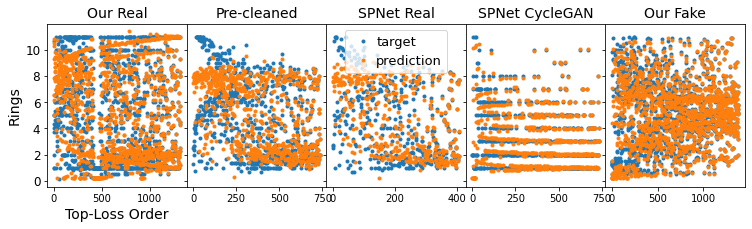

In [ ]:
titles = ['Our Real','Pre-cleaned','SPNet Real','SPNet CycleGAN','Our Fake']
fig = plt.figure(figsize=(len(data_names)*2.5,3))
gs = fig.add_gridspec(1,len(data_names), wspace=0, hspace=0)
axs = gs.subplots( sharey=True)
for i, df in enumerate(dfs):
    axs[i].set_title(titles[i],fontsize=14)
    axs[i].plot(df["target"],'o',label='target', markersize=3)
    axs[i].plot(df["prediction"],'o',label='prediction', markersize=3)
    axs[i].yaxis.set_tick_params(labelsize='large')
    #axs[i].xaxis.set_tick_params(labelsize='large')
    plt.yticks(np.arange(0, 12, 2))

axs[2].legend(loc='upper center', prop={'size': 13}, handletextpad=0.01)#, framealpha=0.5)
axs[0].set_ylabel('Rings', fontsize=14)
axs[0].set_xlabel('Top-Loss Order', fontsize=14)


plt.savefig('top_losses_row.png', bbox_inches='tight')

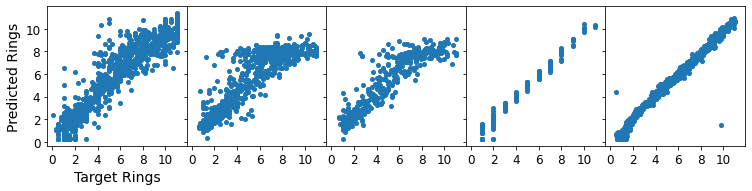

In [ ]:
fig = plt.figure(figsize=(len(data_names)*2.5,3))
gs = fig.add_gridspec(1,len(data_names), wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i, df in enumerate(dfs):
    #axs[i].plot(df["target"],'o',label='target')
    #axs[i].plot(df["prediction"],'o',label='prediction')
    axs[i].plot(df["target"],df["prediction"],'o',markersize=4)
    axs[i].axis('square')
    axs[i].yaxis.set_tick_params(labelsize='large')
    axs[i].xaxis.set_tick_params(labelsize='large')

plt.xticks(np.arange(0, 12, 2))
plt.yticks(np.arange(0, 12, 2))
axs[0].set_xlabel('Target Rings', fontsize=14)
axs[0].set_ylabel('Predicted Rings', fontsize=14)
plt.savefig('ring_tfs_row.png', bbox_inches='tight')

## Figure 4: Agreement of Methods
This is for the left panel in Figure 4. (The middle and right panels were done with Excel and other software.)

This combines two curves:

1.  The bottom of the ["Inference > Segmentation Regression" notebook](pred_segreg_bulk.html) shows a time series graph that gets saved to a file called `rings_vs_t_13400-13600_sr.txt`.
2.  The bottom of the ["Inference > Rings From BBoxes" notebook](infer_rings_in_crops.html) shows a very similar-looking time-series graph, saved to the file `rings_vs_t_13400-13600_crops.txt`.

To make the graph we combined these two time series using `xmgrace`, which...doesn't have a Jupyter plugin.
We can try to recreate the basic aspect of the plot but it won't look the same as in the paper:

In [ ]:
sr_rings = np.loadtxt('rings_vs_t_13400-13600_sr.txt')
crops_rings = np.loadtxt('rings_vs_t_13400-13600_crops.txt')
fps = 15037  # frame rate
t = np.arange(13400,13600)/fps  # time axis

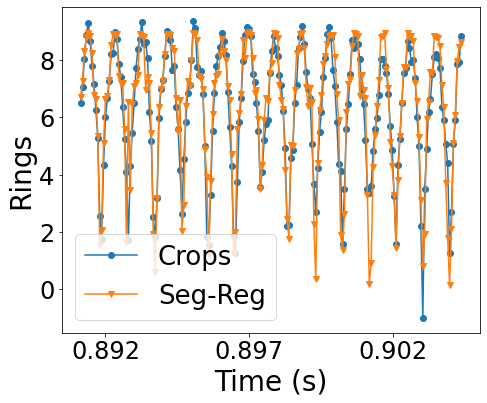

In [ ]:
fig, ax = plt.subplots(figsize=(7.5,6))
ax.plot(t,crops_rings,'o-', label='Crops')  # this is the method we regard as potentially more accuracy
ax.plot(t,sr_rings,'v-', label='Seg-Reg')     # the is the method we weren't sure was going to work out well
ax.set_xlabel('Time (s)', fontsize=28)
ax.set_ylabel('Rings', fontsize=28)
plt.xticks(np.arange(0.892, 0.902, .005), fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='lower left', fontsize=26)
#...and here goes...
plt.savefig('rings_vs_t_13500.png', bbox_inches='tight')

Wow! They're right on top of each other!